In [25]:
ITERATIONS = 20
TEST_SIZE = 0.3
FEATURES = ['alarm_box_borough', 'incident_classification', 'alarm_box_location']
TARGET_ATTRIBUTE = 'incident_response_seconds_qy'
SAVE_AS = 'version-01'

In [26]:
import pandas as pd

df = pd.read_json('/Users/loic.doerr/dev/ny-emergency-ai/rawData/fire-incidents/interims.json')
df.dropna(inplace=True)

df.head()

,starfire_incident_id,incident_datetime,alarm_box_borough,alarm_box_number,alarm_box_location,incident_borough,zipcode,policeprecinct,citycouncildistrict,communitydistrict,...,first_activation_datetime,incident_close_datetime,valid_dispatch_rspns_time_indc,valid_incident_rspns_time_indc,incident_response_seconds_qy,incident_travel_tm_seconds_qy,engines_assigned_quantity,ladders_assigned_quantity,other_units_assigned_quantity,first_on_scene_datetime
1,2100433250140001,2021-01-04T00:01:00.000,BROOKLYN,3325,AVENUE O & E 13 ST,BROOKLYN,11230.0,70.0,48.0,314.0,...,2021-01-04T00:02:00.000,2021-01-04T00:32:00.000,N,Y,170.0,165.0,1,0,0,2021-01-04T00:04:00.000
3,2100416590110004,2021-01-04T00:02:00.000,MANHATTAN,1659,BROADWAY & 153 ST,MANHATTAN,10031.0,30.0,7.0,109.0,...,2021-01-04T00:02:00.000,2021-01-04T00:31:00.000,N,Y,318.0,314.0,1,0,0,2021-01-04T00:07:00.000
4,2100413490110006,2021-01-04T00:02:00.000,MANHATTAN,1349,5 AVE & 112 ST,MANHATTAN,10026.0,28.0,9.0,110.0,...,2021-01-04T00:03:00.000,2021-01-04T00:18:00.000,N,Y,871.0,834.0,1,0,0,2021-01-04T00:17:00.000
5,2100412610150005,2021-01-04T00:06:00.000,QUEENS,1261,ALMEDA AVE & B63 ST,QUEENS,11692.0,100.0,31.0,414.0,...,2021-01-04T00:07:00.000,2021-01-04T00:18:00.000,N,Y,341.0,336.0,1,0,0,2021-01-04T00:12:00.000
6,2100479410150006,2021-01-04T00:07:00.000,QUEENS,7941,B'WAY & BAXTER AVE,QUEENS,11373.0,110.0,25.0,404.0,...,2021-01-04T00:08:00.000,2021-01-04T00:42:00.000,N,Y,307.0,267.0,2,2,1,2021-01-04T00:12:00.000


In [27]:
features = df[FEATURES]
features = pd.get_dummies(features, columns=FEATURES, dtype=int)

features.head()

,alarm_box_borough_BRONX,alarm_box_borough_BROOKLYN,alarm_box_borough_MANHATTAN,alarm_box_borough_QUEENS,alarm_box_borough_RICHMOND / STATEN ISLAND,incident_classification_Abandoned Derelict Vehicle Fire,incident_classification_Alarm System - Defective,incident_classification_Alarm System - Testing,incident_classification_Alarm System - Unnecessary,incident_classification_Assist Civilian - Non-Medical,...,congressionaldistrict_7.0,congressionaldistrict_8.0,congressionaldistrict_9.0,congressionaldistrict_10.0,congressionaldistrict_11.0,congressionaldistrict_12.0,congressionaldistrict_13.0,congressionaldistrict_14.0,congressionaldistrict_15.0,congressionaldistrict_16.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
target = df[TARGET_ATTRIBUTE]

target.head()

1    170.0
3    318.0
4    871.0
5    341.0
6    307.0
Name: incident_response_seconds_qy, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

models = []
errors = []

for iteration in range(ITERATIONS):
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=iteration) 
  model = LinearRegression()
  model.fit(features_train, target_train)
  target_pred = model.predict(features_test)
  mse = metrics.mean_squared_error(target_test, target_pred)
  models.append(model)
  errors.append(mse)

print('Errors', errors)

Errors [3.685036777566018e+26, 2.5986363458497476e+25, 9.952968346667593e+23, 8.6556164911628e+23, 32033.25033597218, 3.780065083780883e+27, 9.449723254226635e+23, 9.250268419396213e+22, 28325.51698500647, 31168.70038886032, 3.202627686705955e+26, 1.3602958163131965e+25, 9.437203330756587e+25, 9.99360999514258e+24, 1.0388586754079068e+26, 1.3371566624009494e+22, 31363.88338718926, 6.3559598922101214e+25, 2.82207088763158e+22, 3.587102062847741e+26]


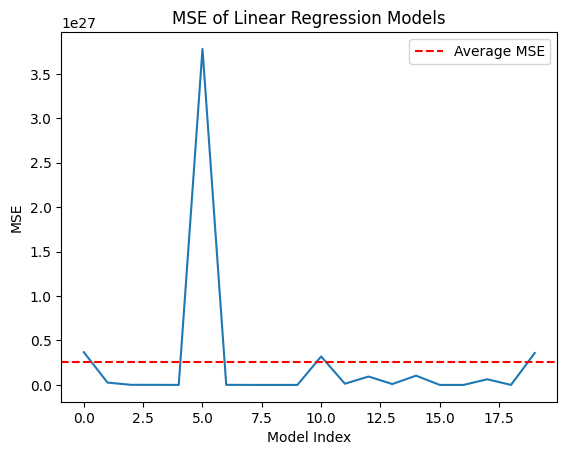

In [30]:
import matplotlib.pyplot as plt
import numpy as np

average_error = np.mean(errors)

plt.plot(errors)
plt.axhline(average_error, color='r', linestyle='--', label='Average MSE')
plt.xlabel('Model Index')
plt.ylabel('MSE')
plt.title('MSE of Linear Regression Models')
plt.legend()
plt.show()

In [31]:
best_model_index = errors.index(min(errors))
best_model = models[best_model_index]

print('Best Model MSE', min(errors))

Best Model MSE 28325.51698500647


In [32]:
import joblib
from pathlib import Path

joblib.dump(best_model, f'{Path.cwd()}/../models/model.pkl')

joblib.dump(FEATURES, f'{Path.cwd()}/../models/features.pkl')
joblib.dump(TARGET_ATTRIBUTE, f'{Path.cwd()}/../models/target.pkl')

['/Users/loic.doerr/dev/ny-emergency-ai/src/../models/target.pkl']